# AAL Sales Analysis - Q4 2020

This notebook contains the analysis of AAL's sales data for the fourth quarter of 2020 across Australia. The analysis includes data wrangling, statistical analysis, visualization, and recommendations for the Head of Sales and Marketing.

## 1. Data Wrangling

First, let's import the necessary libraries and load our data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime

# Set the style for our visualizations
plt.style.use('default')
sns.set_theme()

# Read the data
df = pd.read_csv('AusApparalSales4thQrt2020.csv')

# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y')

# Display the first few rows and basic information
print("First few rows of the dataset:")
display(df.head())

print("\nDataset information:")
display(df.info())

First few rows of the dataset:


,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


None

### 1.1 Data Cleaning

Let's check for missing values and handle them appropriately.

In [10]:
# Check for missing values
print("Missing values in each column:")
display(df.isna().sum())

# Check for duplicate rows
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

# Check for any inconsistencies in categorical columns
print("\nUnique values in categorical columns:")
print("\nStates:", df['State'].unique())
print("\nGroups:", df['Group'].unique())
print("\nTime periods:", df['Time'].unique())



Missing values in each column:


Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
Week     0
Month    0
dtype: int64


Number of duplicate rows: 0

Unique values in categorical columns:

States: [' WA' ' NT' ' SA' ' VIC' ' QLD' ' NSW' ' TAS']

Groups: [' Kids' ' Men' ' Women' ' Seniors']

Time periods: [' Morning' ' Afternoon' ' Evening']


### 1.2 Data Normalization

We'll normalize the numerical columns to ensure consistent scaling.

In [4]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for normalization
numerical_cols = ['Sales', 'Unit']

# Create a copy of the dataframe for normalized values
df_normalized = df.copy()

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the numerical columns
df_normalized[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Normalized data sample:")
display(df_normalized.head())

Normalized data sample:


,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,0.095238,0.095238
1,2020-10-01,Morning,WA,Men,0.095238,0.095238
2,2020-10-01,Morning,WA,Women,0.031746,0.031746
3,2020-10-01,Morning,WA,Seniors,0.206349,0.206349
4,2020-10-01,Afternoon,WA,Kids,0.015873,0.015873


## 2. Data Analysis

Let's perform descriptive statistical analysis on the data.

In [5]:
# Descriptive statistics for Sales and Units
print("Descriptive Statistics for Sales and Units:")
display(df[['Sales', 'Unit']].describe())

# Group-wise sales analysis
group_sales = df.groupby('Group')['Sales'].agg(['sum', 'mean', 'median', 'std']).round(2)
print("\nGroup-wise Sales Analysis:")
display(group_sales)

# State-wise sales analysis
state_sales = df.groupby('State')['Sales'].agg(['sum', 'mean', 'median', 'std']).round(2)
print("\nState-wise Sales Analysis:")
display(state_sales)

# Time-of-day analysis
time_sales = df.groupby('Time')['Sales'].agg(['sum', 'mean', 'median', 'std']).round(2)
print("\nTime-of-day Sales Analysis:")
display(time_sales)

Descriptive Statistics for Sales and Units:


,Sales,Unit
count,7560.000000,7560.000000
mean,45013.558201,18.005423
std,32253.506944,12.901403
min,5000.000000,2.000000
25%,20000.000000,8.000000
50%,35000.000000,14.000000
75%,65000.000000,26.000000
max,162500.000000,65.000000



Group-wise Sales Analysis:


,sum,mean,median,std
Group,,,,
Kids,85072500,45011.90,35000.0,31871.49
Men,85750000,45370.37,35000.0,32177.18
Seniors,84037500,44464.29,35000.0,32195.36
Women,85442500,45207.67,35000.0,32781.64



State-wise Sales Analysis:


,sum,mean,median,std
State,,,,
NSW,74970000,69416.67,70000.0,20626.65
NT,22580000,20907.41,20000.0,8961.91
QLD,33417500,30942.13,30000.0,13344.64
SA,58857500,54497.69,52500.0,17460.97
TAS,22760000,21074.07,20000.0,9024.68
VIC,105565000,97745.37,95000.0,26621.60
WA,22152500,20511.57,20000.0,9231.91



Time-of-day Sales Analysis:


,sum,mean,median,std
Time,,,,
Afternoon,114007500,45241.07,35000.0,32318.43
Evening,112087500,44479.17,35000.0,32086.90
Morning,114207500,45320.44,35000.0,32360.63


### 2.1 Weekly and Monthly Analysis

In [6]:
# Add week and month columns
df['Week'] = df['Date'].dt.isocalendar().week
df['Month'] = df['Date'].dt.month

# Weekly analysis
weekly_sales = df.groupby(['Week', 'State'])['Sales'].sum().unstack()
print("Weekly Sales by State:")
display(weekly_sales)

# Monthly analysis
monthly_sales = df.groupby(['Month', 'State'])['Sales'].sum().unstack()
print("\nMonthly Sales by State:")
display(monthly_sales)

Weekly Sales by State:


State,NSW,NT,QLD,SA,TAS,VIC,WA
Week,,,,,,,
40,3382500,1052500,1627500,2542500,1052500,4355000,1032500
41,5892500,1937500,2545000,4942500,1947500,7865000,1872500
42,5717500,1935000,2637500,4822500,1845000,7847500,1835000
43,5922500,1907500,2592500,4832500,1907500,7742500,1910000
44,4822500,1520000,1997500,3987500,1477500,6577500,1425000
45,4915000,1150000,1825000,3772500,1312500,6687500,1202500
46,4957500,1247500,1905000,3650000,1287500,6930000,1195000
47,4987500,1282500,1875000,3572500,1227500,6975000,1192500
48,5147500,1267500,1957500,3555000,1300000,6990000,1260000



Monthly Sales by State:


State,NSW,NT,QLD,SA,TAS,VIC,WA
Month,,,,,,,
10,25007500,8222500,11120000,20610000,8015000,33442500,7872500
11,21490000,5257500,8110000,15532500,5545000,29530000,5217500
12,28472500,9100000,14187500,22715000,9200000,42592500,9062500


## 3. Data Visualization

Let's create visualizations to better understand the sales patterns.

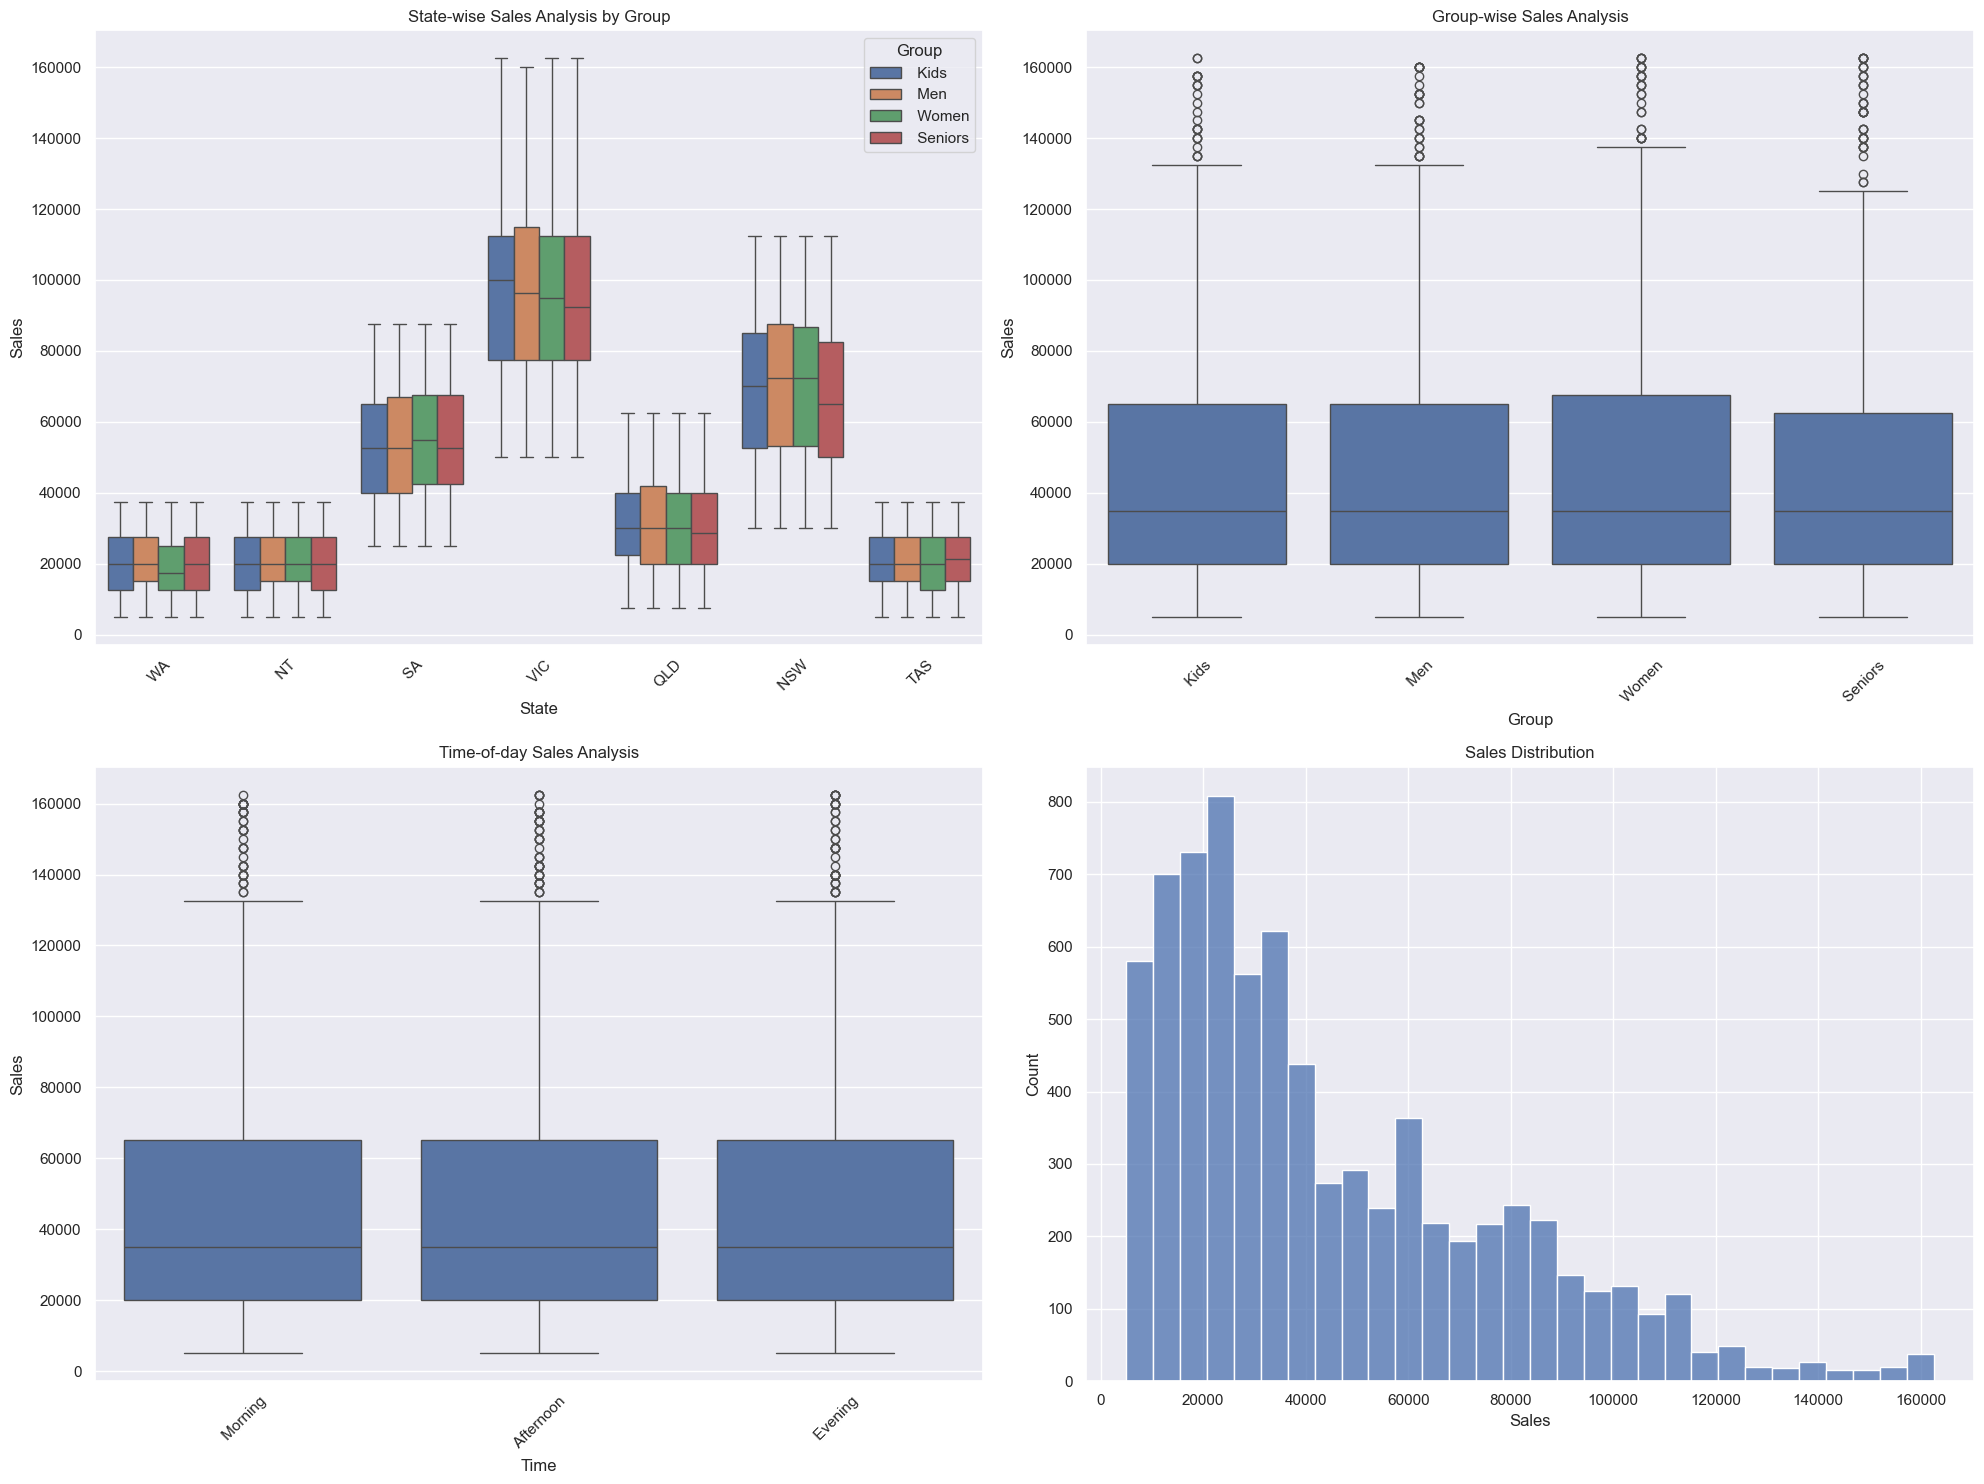

In [7]:
# Set figure size for better visualization
plt.figure(figsize=(20, 15))

# 1. State-wise sales analysis for different groups
plt.subplot(2, 2, 1)
sns.boxplot(x='State', y='Sales', hue='Group', data=df)
plt.title('State-wise Sales Analysis by Group')
plt.xticks(rotation=45)

# 2. Group-wise sales analysis across states
plt.subplot(2, 2, 2)
sns.boxplot(x='Group', y='Sales', data=df)
plt.title('Group-wise Sales Analysis')
plt.xticks(rotation=45)

# 3. Time-of-day analysis
plt.subplot(2, 2, 3)
sns.boxplot(x='Time', y='Sales', data=df)
plt.title('Time-of-day Sales Analysis')
plt.xticks(rotation=45)

# 4. Sales distribution
plt.subplot(2, 2, 4)
sns.histplot(data=df, x='Sales', bins=30)
plt.title('Sales Distribution')

plt.tight_layout()
plt.show()

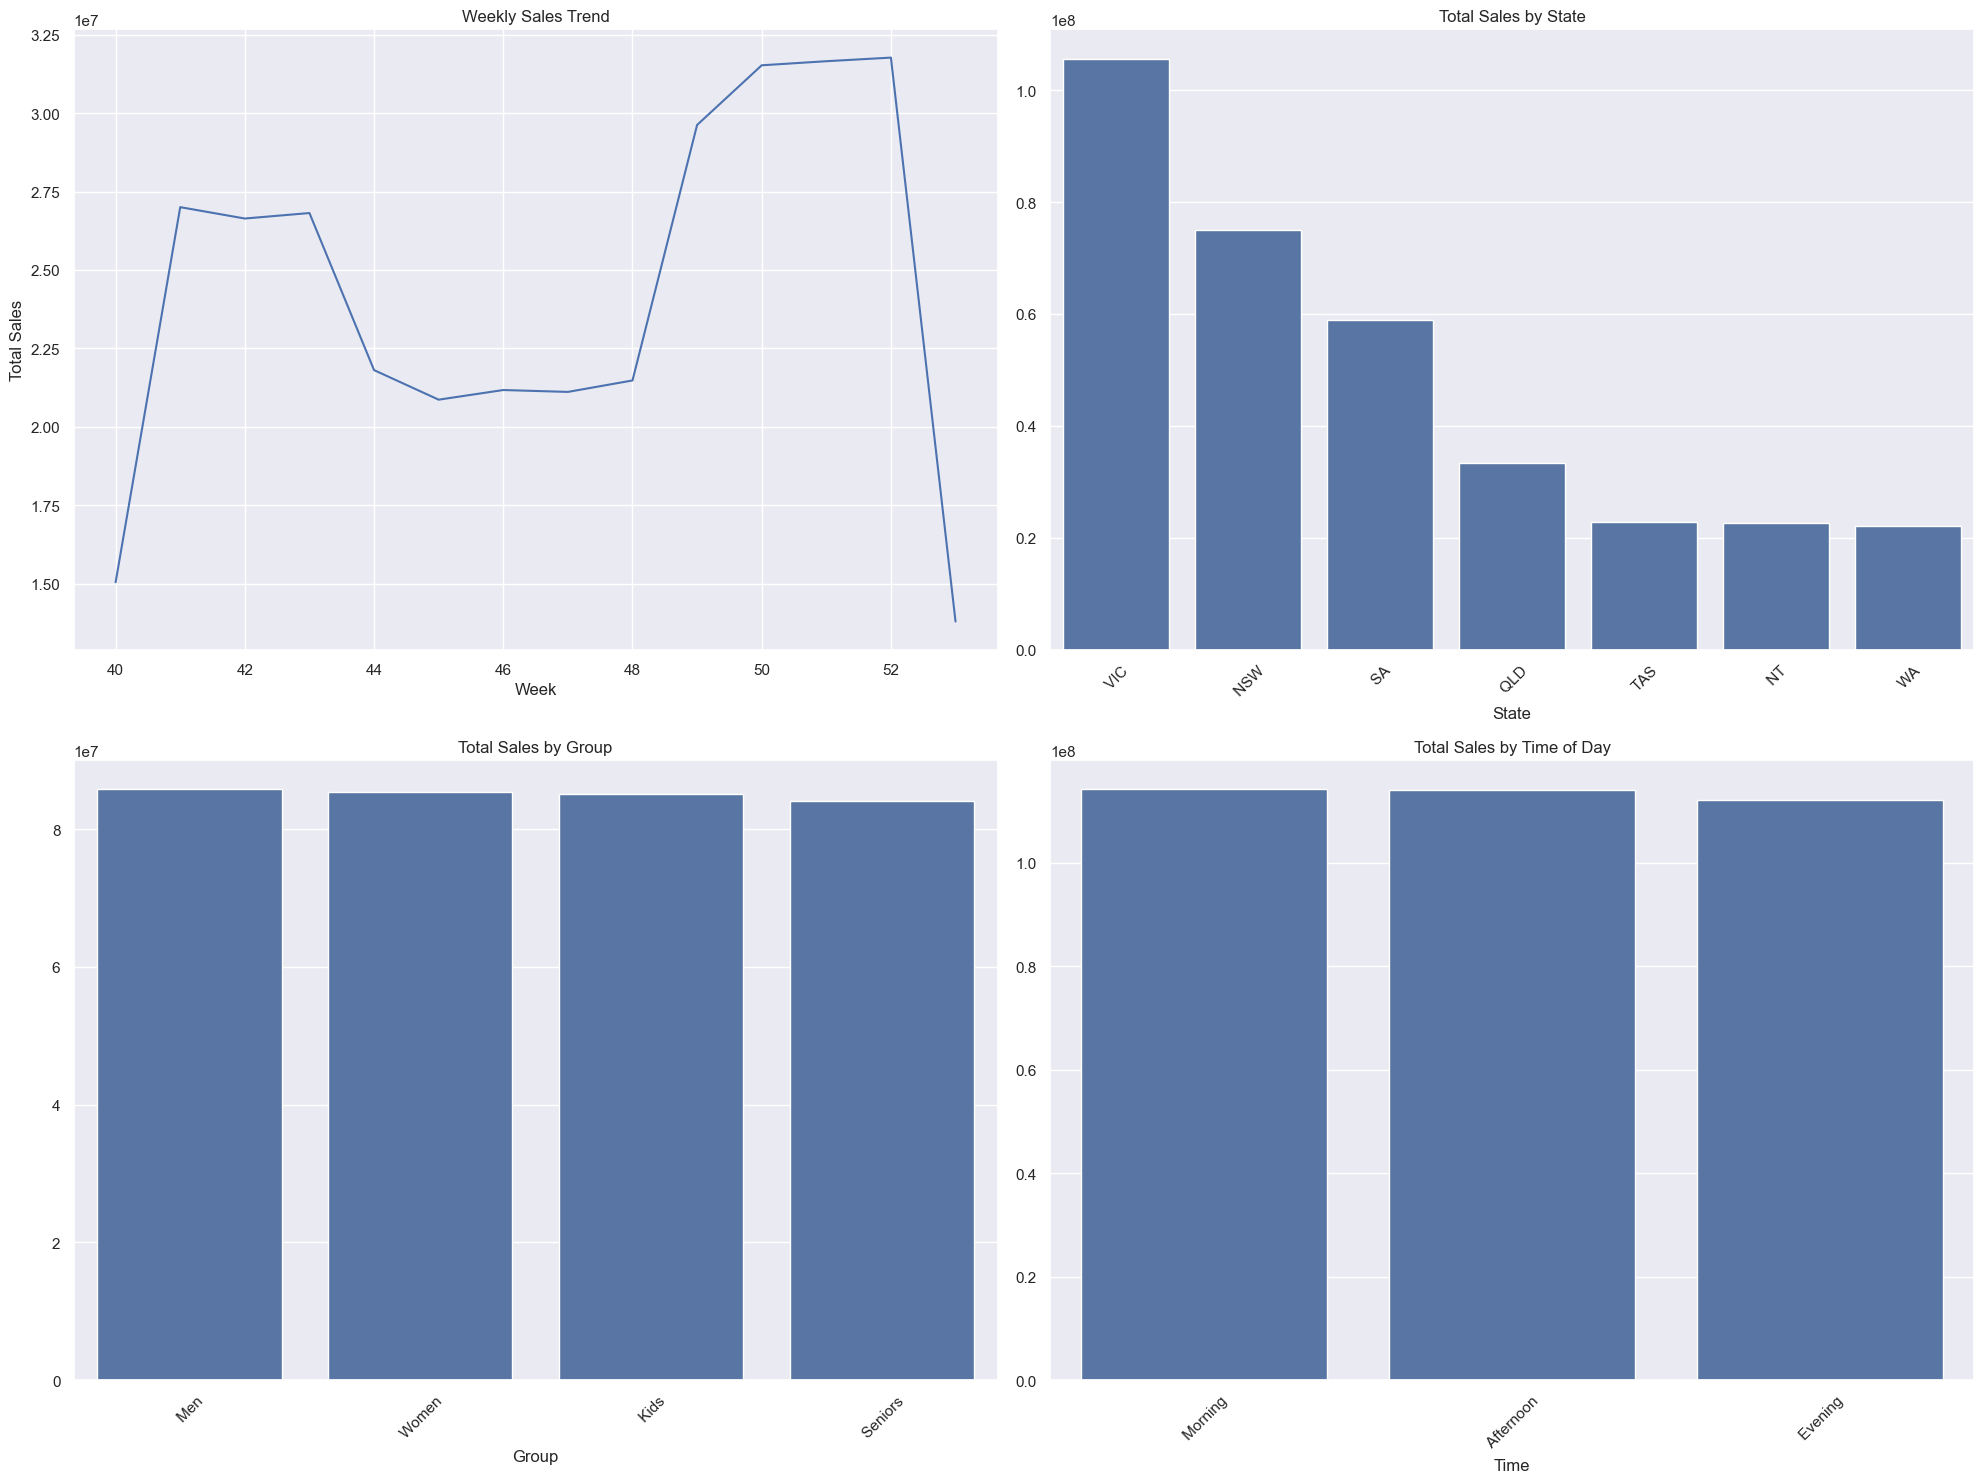

In [8]:
# Additional visualizations
plt.figure(figsize=(20, 15))

# 1. Weekly sales trend
plt.subplot(2, 2, 1)
weekly_trend = df.groupby('Week')['Sales'].sum()
sns.lineplot(data=weekly_trend)
plt.title('Weekly Sales Trend')
plt.xlabel('Week')
plt.ylabel('Total Sales')

# 2. State-wise total sales
plt.subplot(2, 2, 2)
state_total = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=state_total.index, y=state_total.values)
plt.title('Total Sales by State')
plt.xticks(rotation=45)

# 3. Group-wise total sales
plt.subplot(2, 2, 3)
group_total = df.groupby('Group')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=group_total.index, y=group_total.values)
plt.title('Total Sales by Group')
plt.xticks(rotation=45)

# 4. Time-of-day total sales
plt.subplot(2, 2, 4)
time_total = df.groupby('Time')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=time_total.index, y=time_total.values)
plt.title('Total Sales by Time of Day')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 4. Recommendations

Based on our analysis, here are the key findings and recommendations for the Head of Sales and Marketing:

1. **State-wise Performance:**
 - Finding: Victoria (VIC) and New South Wales (NSW) are by far the top-performing states, with VIC's total sales (105.5M) significantly outpacing all others. SA is a strong third-tier performer (58.8M), while QLD is mid-tier (33.4M). WA, NT, and TAS represent the lowest sales tier, each contributing around 22M.
 - Recommendation: The most significant opportunity for growth lies in optimizing geographic strategy.
   
2. **Group-wise Performance:**
 - Finding: Sales performance is remarkably consistent across all four customer groups (Men, Women, Kids, Seniors). Total sales for each group are nearly identical (around 84M-85M), indicating a broad and balanced customer appeal.
 - Recommendation:
 - Maintain Balanced Marketing: The current marketing strategy effectively resonates with all demographic segments. Continue this balanced, inclusive approach.
 - Promote Cross-Selling: Since all groups are strong performers, there is a clear opportunity for cross-selling and up-selling. Implement 'family-focused' promotions or bundle deals (e.g., discounts when purchasing from Men's, Women's, and Kids' sections in one transaction) to increase the average transaction value.

3. **Time-of-day and Seasonal Analysis:**
 - Finding (Time of Day): Sales are very evenly distributed across Morning, Afternoon, and Evening.
 - Recommendation (Time of Day): Store staffing and operational resource allocation can remain consistent throughout the day, as no specific time block shows a significant sales advantage.
 - Finding (Seasonal): A clear seasonal trend emerged, with a significant sales surge in December (peaking in week 52) due to the holiday season. A noticeable dip occurred in November.
 - Recommendation (Seasonal): Align the marketing and operational calendar with these trends. Prepare inventory and launch major campaigns in late November to capitalize on the December peak. Investigate the November dip and consider targeted promotions (e.g., Black Friday sales) to smooth the sales curve and capture early holiday shoppers.

4. **Strategic Recommendations:**
 - Primary Focus on Geographic Strategy: The most substantial performance variance is geographical, not demographical. The primary strategic focus for the next quarter should be on leveraging learnings from top states to elevate the performance of mid and low-tier states.
 - Leverage Broad Appeal as a Strength: The equal performance across all customer groups is a significant strength. This 'something for everyone' appeal should be a cornerstone of brand messaging.
 - Optimize for Holiday Peak: The December sales peak is the most critical period of the quarter. Early planning for marketing, promotions, and inventory is essential to maximize revenue during this time.